/var/folders/yv/xlbmlrh90c7bcl6zn1k7n12w0000gn/T/ipykernel_2922/419151642.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x[0], y[0], 'ro', c="b")


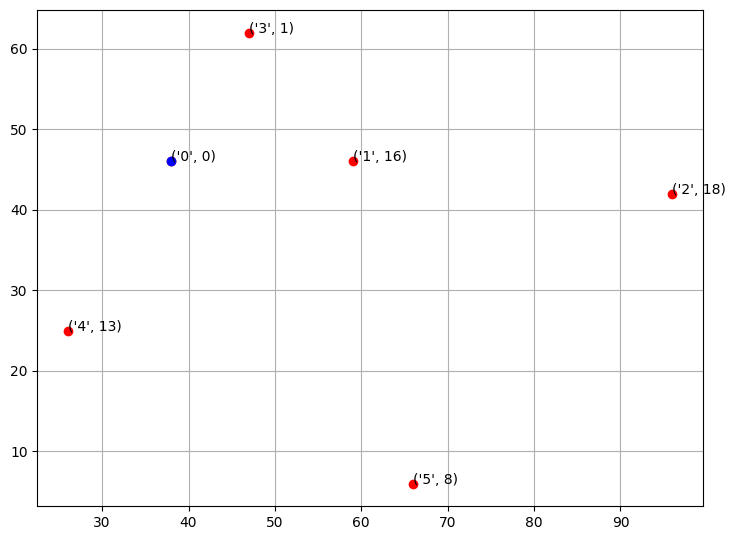

In [44]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True

N = 5

x = [38, 59, 96, 47, 26, 66]
y = [46, 46, 42, 62, 25,  6]
demand = [0, 16, 18, 1, 13, 8]

plt.plot(x, y, 'ro')

i = 0
for xy in zip(x, y):
   plt.annotate((str(i), demand[i]), xy=xy, )
   i += 1

plt.plot(x[0], y[0], 'ro', c="b")

plt.grid()
plt.show()



Total: 51
Capacidad Máxima: 30
51/30 = 2

1,2,3,4,5





In [51]:
#x = [38, 59, 96, 47, 26, 66]
#y = [46, 46, 42, 62, 25,  6]
#demand = [0, 16, 18, 1, 13, 8]

objects = [[38, 46], [59,46], [66,6], [38, 46]]

def CVRP_function(routes):
    distance = 0
    for i in np.arange(len(routes)-1):
        distance += np.sqrt((routes[i][0] - routes[i+1][0])**2 + (routes[i][1] - routes[i+1][1])**2)
    return distance
       

In [52]:
print(CVRP_function(objects))

110.43410347142871


In [ ]:
[0,-1,-1,4,-1,-1,0]

In [ ]:
import numpy as np
import math
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import time


class SAnnealing(object):

    def __init__(self, domain, step = 1, final_temperature=0.1, temperature = 100, alpha=0.95, equilibrium=10, time = 0, limited_decimals = 1):
        self.domain = domain
        self.step = step
        self.temperature = temperature
        self.final_temperature = final_temperature
        self.alpha = alpha
        self.equilibrium = equilibrium
        self.time = time
        self.limited_decimals = limited_decimals

    def cost_function(self, f, x):
        return f(x)

    def create_first_solution(self):
         return 

        1,2,3,4,5
         [[3,1,5],[2,4]]
         [[],[3,1,5,2,4]]
         [[1,5],[3,2,4]]


    def count_decimals(num):
        """
        Devuelve el número de decimales que tiene un número flotante.
        """
        num_str = str(num)

        decimal_index = num_str.find('.')

        if decimal_index == -1:
            return 0
        else:
            return len(num_str) - decimal_index - 1

    def create_neighbor_solution(self, actual_solution):
        neighbor = actual_solution.copy()
        
        0,1,2,3,4
        [[1,5],[2,3,4]] 
        idx = np.random.randint(len(actual_solution))
        


    def aceptance_probability(self, deltaE, temperature):
        try:
            r = math.exp(-deltaE/temperature)
        except OverflowError:
            r = float("inf") 
        return r


    def update_temperature(self, temperature):
        return self.alpha * temperature


    def fit(self, objetive):
        self.cost_ = []
        actual_solution = self.create_first_solution()
        best_solution = actual_solution.copy()
        epoch = 0
        number_tested_solution = 0
        aceptanced = 100
        inicio = time.time()
        while (self.temperature > self.final_temperature):
            number_worst_solution_acepted = 0
            i = 0
            while (i < self.equilibrium):
                random_solution = self.create_neighbor_solution(actual_solution)
                number_tested_solution += 1
                delta_E = self.cost_function(objetive, random_solution)[1] - self.cost_function(objetive, actual_solution)[1]
                if delta_E > 0:
                    actual_solution = random_solution.copy()
                else:
                    deg_deltaE = self.aceptance_probability(-delta_E, self.temperature)
                    if(np.random.uniform(0, 1) < deg_deltaE):
                        actual_solution = random_solution.copy()
                        number_worst_solution_acepted += 1
                x, y = self.cost_function(objetive, actual_solution)
                self.cost_.append((x,y))
                epoch_strlen = len(str(epoch))
                fin = time.time()
                total = fin - inicio
                sys.stderr.write('\r%0*d Epoch | Equilibrium %d | Temperature %.2f '
                                '| Actual solution %f | Cost function: %.2f | Aceptance : %.2f | Time: %f' 
                        %
                        (epoch_strlen, epoch+1, i+1, self.temperature, 
                        x, y, aceptanced, total))
                time.sleep(self.time)
                sys.stderr.flush()
                i += 1
                epoch += 1
            aceptanced = number_worst_solution_acepted * 100 /number_tested_solution
            self.temperature = self.update_temperature(self.temperature)